# Live trade list quick PnL

Fill the variables below, then run.

rows: 38
portfolio_return: 0.005593842451755439
return stats:
count    38.000000
mean      0.005594
std       0.009923
min      -0.018456
25%       0.001306
50%       0.003755
75%       0.009635
max       0.048598
Name: return, dtype: float64


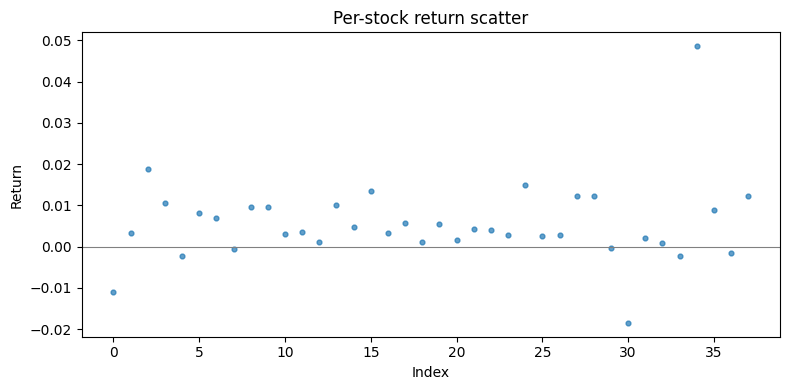

,code,weight,return
0,110090.SH,0.026316,-0.010909
1,110098.SH,0.026316,0.003430
2,111013.SH,0.026316,0.018771
3,111015.SH,0.026316,0.010490
4,113048.SH,0.026316,-0.002274


In [14]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---- settings ----
trade_day = '2026-01-09'  # trade_list date
signal_name = 'combo_default'
batch_id = 'Live'
results_root = Path('D:/cbond_daily/results')
cleaned_root = Path('D:/cbond_daily/clean_data')

buy_twap_col = 'twap_0930_1000'
sell_twap_col = 'twap_1430_1500'
twap_bps = 1.5
fee_bps = 0.7

# ---- load trade list ----
trade_dir = results_root / 'live' / trade_day / batch_id / signal_name
trade_path = trade_dir / 'trade_list.csv'
trades = pd.read_csv(trade_path)
trades['trade_date'] = pd.to_datetime(trades['trade_date']).dt.date

# ---- load cleaned data for trade_day ----
day = pd.to_datetime(trade_day).date()
month = f'{day.year:04d}-{day.month:02d}'
cleaned_path = cleaned_root / month / f'{day:%Y%m%d}.parquet'
df = pd.read_parquet(cleaned_path)

# ---- merge and compute return ----
merged = trades.merge(df[['code', buy_twap_col, sell_twap_col]], on='code', how='left')

def apply_bps(px, bps, side):
    if side == 'buy':
        return px * (1 + bps / 10000.0)
    return px * (1 - bps / 10000.0)

cost_bps = twap_bps + fee_bps
buy_px = apply_bps(merged[buy_twap_col], cost_bps, 'buy')
sell_px = apply_bps(merged[sell_twap_col], cost_bps, 'sell')
merged['return'] = (sell_px - buy_px) / buy_px

# ---- summary ----
merged['weight'] = merged.get('weight', 1.0 / len(merged))
merged['weight'] = merged['weight'].fillna(0.0)
port_ret = float((merged['return'] * merged['weight']).sum())
print('rows:', len(merged))
print('portfolio_return:', port_ret)

# ---- per-stock stats ----
stats = merged['return'].describe()
print('return stats:')
print(stats)

# ---- scatter plot ----
plt.figure(figsize=(8, 4))
plt.scatter(range(len(merged)), merged['return'], s=12, alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Per-stock return scatter')
plt.xlabel('Index')
plt.ylabel('Return')
plt.tight_layout()
plt.show()
merged[['code', 'weight', 'return']].head()


In [15]:
merged

,trade_date,code,weight,twap_0930_1000,twap_1430_1500,return
0,2026-01-09,110090.SH,0.026316,147.9287,146.3793,-0.010909
1,2026-01-09,110098.SH,0.026316,136.3097,136.8374,0.003430
2,2026-01-09,111013.SH,0.026316,137.2551,139.8931,0.018771
3,2026-01-09,111015.SH,0.026316,129.9659,131.3871,0.010490
4,2026-01-09,113048.SH,0.026316,126.6760,126.4436,-0.002274
5,2026-01-09,113597.SH,0.026316,134.4117,135.5583,0.008087
6,2026-01-09,113633.SH,0.026316,122.1868,123.0914,0.006960
7,2026-01-09,113638.SH,0.026316,125.0583,125.0381,-0.000601
8,2026-01-09,113643.SH,0.026316,132.2570,133.5913,0.009644
9,2026-01-09,113644.SH,0.026316,140.5853,141.9981,0.009605
